In [32]:
import numpy as np
import pandas as pd	
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
import datetime
import keras_tuner as kt


In [33]:

'''fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()'''
fashion_mnist = tf.keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [34]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
    model.add(tf.keras.layers.Dense(units=hp.Int('units_1', min_value=320, max_value=512, step=32), activation='relu'))
    model.add(tf.keras.layers.Dense(units=hp.Int('units_2', min_value=32, max_value=320, step=32), activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer=tf.keras.optimizers.SGD(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [35]:
from kerastuner.tuners import RandomSearch

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(
    optimizer = optimizer,
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"])


'''tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,  # Number of hyperparameter combinations to try
    executions_per_trial=3,  # Number of times to evaluate each combination
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hps)'''

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [36]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9043 - loss: 0.3156 - val_accuracy: 0.9722 - val_loss: 0.0951
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9656 - loss: 0.1097 - val_accuracy: 0.9780 - val_loss: 0.0770
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9746 - loss: 0.0812 - val_accuracy: 0.9824 - val_loss: 0.0715
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9797 - loss: 0.0629 - val_accuracy: 0.9848 - val_loss: 0.0586
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9829 - loss: 0.0512 - val_accuracy: 0.9836 - val_loss: 0.0723
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9842 - loss: 0.0459 - val_accuracy: 0.9814 - val_loss: 0.0703
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9866 - loss: 0.0393 - val_accuracy: 0.9844 - val_loss: 0.0636
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9878 - loss: 0.0352 - 

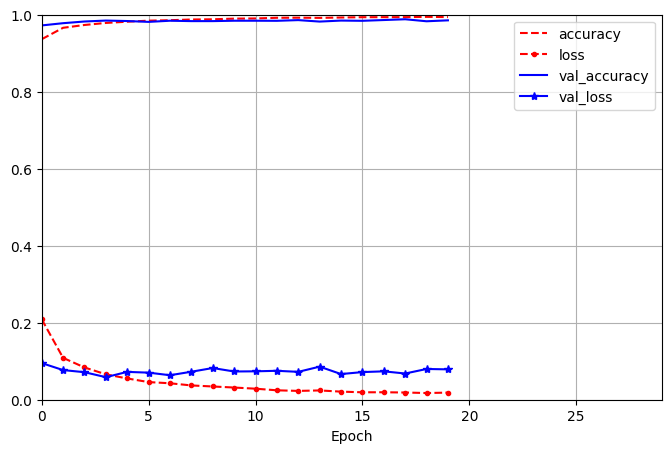

0.9825

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal",
    use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal",
    use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)
model.compile(
    optimizer = optimizer,
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[tensorboard_callback])

y_pred = model.predict(X_test)
accuracy_score(y_test, np.argmax(y_pred, axis=-1))
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()
accuracy_score(y_test, np.argmax(y_pred, axis=-1))

c:\Users\yardz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\yardz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4599 - loss: 1.8022 - val_accuracy: 0.8290 - val_loss: 0.8417
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8051 - loss: 0.8166 - val_accuracy: 0.8826 - val_loss: 0.5244
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8498 - loss: 0.5840 - val_accuracy: 0.8986 - val_loss: 0.4126
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8699 - loss: 0.4863 - val_accuracy: 0.9094 - val_loss: 0.3569
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8794 - loss: 0.4432 - val_accuracy: 0.9154 - val_loss: 0.3241
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8884 - loss: 0.4017 - val_accuracy: 0.9192 - val_loss: 0.3024
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8921 - loss: 0.3820 - val_accuracy: 0.9234 - val_loss: 0.2872
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8956 - loss: 0

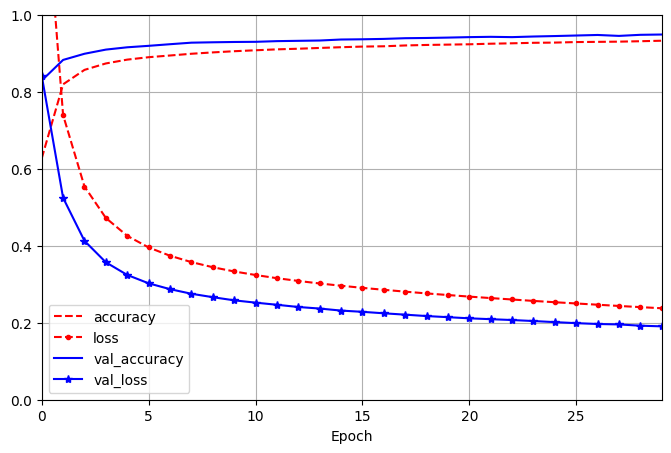

0.962

In [38]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.3) 

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation=leaky_relu, kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation=leaky_relu, kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, activation="softmax")])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(
    optimizer = optimizer,
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[tensorboard_callback])

y_pred = model.predict(X_test)
accuracy_score(y_test, np.argmax(y_pred, axis=-1))
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()
accuracy_score(y_test, np.argmax(y_pred, axis=-1))